In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
plt.rcParams.update({'font.size': 16})
# ① 読み込むファイル群を指定（必要に応じてパスを調整）
file_paths = [
    "../../experiments/MNIST_cl16_attc2_datasize6000_groups[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]]_ep400_alpha10.0_20250630_215453/experiment_info.json",
    "../../experiments/MNIST_cl16_attc2_datasize6000_groups[[0, 8], [1, 9], [2, 10], [3, 11], [4, 12], [5, 13], [6, 14], [7, 15]]_ep400_alpha10.0_20250630_225825/experiment_info.json"
]
# ② 各ファイルから必要データだけ抽出
data_list = []
for path in file_paths:
    with open(path, 'r') as f:
        d = json.load(f)
    data_list.append({
        'groups': d['groups'],
        'rob':    d['rob'],
        'suc':    d['suc'],
        'tie':    d['tie'],
        'fai':    d['fai'],
        'label':  path.split('/')[-1].replace('.json','')  # グラフのタイトル用
    })


# 色の設定
metric_colors = {
    'robust': '#4C72B0',
    'success': '#DD8452',
    'tie': '#55A868',
    'failure': '#C44E52'
}

m = len(data_list)
n = len(data_list[0]['rob'])
x = np.arange(n)
total_width = 0.8
width = total_width / m
offsets = (np.arange(m) - (m-1)/2) * width

fig, ax = plt.subplots(figsize=(6 + m*2, 6))
ax.grid(True)
# プロット
for i, dicts in enumerate(data_list):
    rob = dicts['rob']
    suc = dicts['suc']
    tie = dicts['tie']
    fai = dicts['fai']
    xpos = x + offsets[i]
    ax.bar(xpos, rob, width, color=metric_colors['robust'])
    ax.bar(xpos, suc, width, bottom=rob, color=metric_colors['success'])
    ax.bar(xpos, tie, width, bottom=np.array(rob)+np.array(suc), color=metric_colors['tie'])
    ax.bar(xpos, fai, width, bottom=np.array(rob)+np.array(suc)+np.array(tie), color=metric_colors['failure'])

# 軸設定
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in x])
ax.set_xlabel('Client index')
ax.set_ylabel('Accuracy')
ax.set_yticks(np.arange(0.7, 1.01, 0.1))
ax.set_ylim(0.7, 1.0)
# 共通凡例
handles = [mpatches.Patch(color=c, label=label) for label, c in metric_colors.items()]
fig.legend(handles=handles, ncol=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
ax.set_title('Homogeneous vs Heterogeneous 2-Client Pairs: 1 Attacker in 16 Clients\n')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../../experiments/MNIST_cl16_attc2_datasize6000_groups[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]]_ep400_alpha10.0_20250630_215453/experiment_info.json'

defaultdict(<class 'list'>, {'1': [{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.0056500000000000005, '1': 0.008299999999999998, '2': 0.0054, '3': 0.00655, '4': 0.0068000000000000005, '5': 0.0056500000000000005, '6': 0.007049999999999999, '7': 0.005800000000000001, '8': 0.0010999999999999998, '9': 0.0010999999999999998, '10': 0.001, '11': 0.0010999999999999998, '12': 0.00125, '13': 0.0010999999999999998, '14': 0.00135, '15': 0.001, '16': 0.0037000000000000006, '17': 0.00355, '18': 0.0037000000000000006, '19': 0.0041500000000000

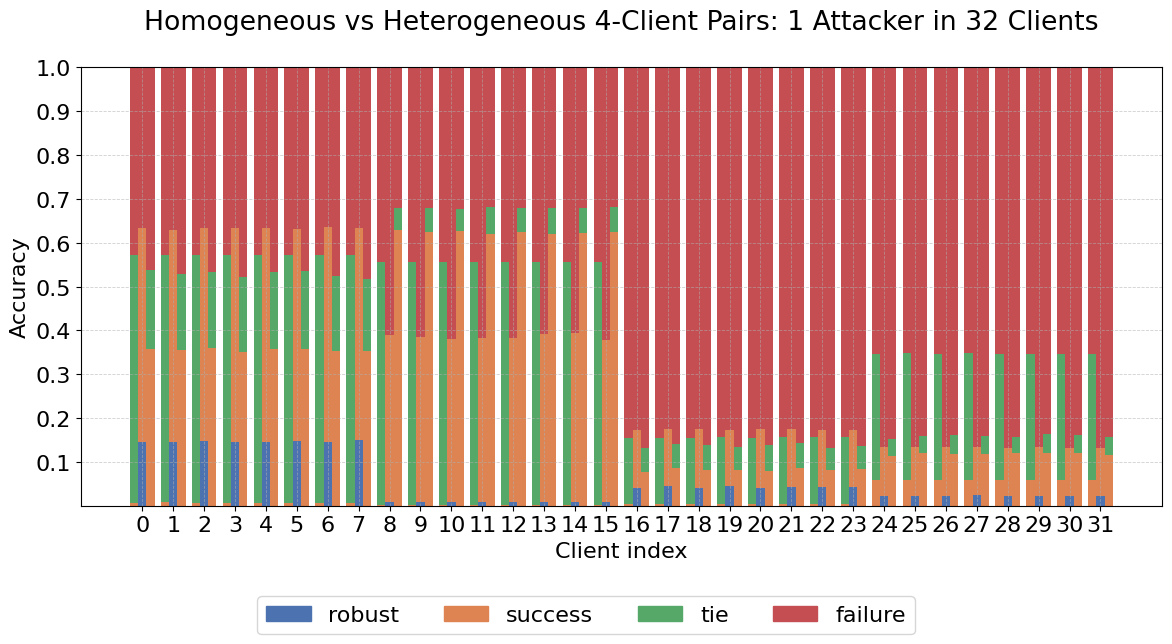

{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.005800000000000001, '1': 0.009000000000000003, '2': 0.0055000000000000005, '3': 0.006900000000000001, '4': 0.007200000000000001, '5': 0.005800000000000001, '6': 0.0075000000000000015, '7': 0.006000000000000001, '8': 0.0010999999999999998, '9': 0.0010999999999999998, '10': 0.001, '11': 0.0010999999999999998, '12': 0.0013000000000000002, '13': 0.0010999999999999998, '14': 0.0014000000000000002, '15': 0.001, '16': 0.0038000000000000004, '17': 0.0036000000000000003, '18': 0.003800000000

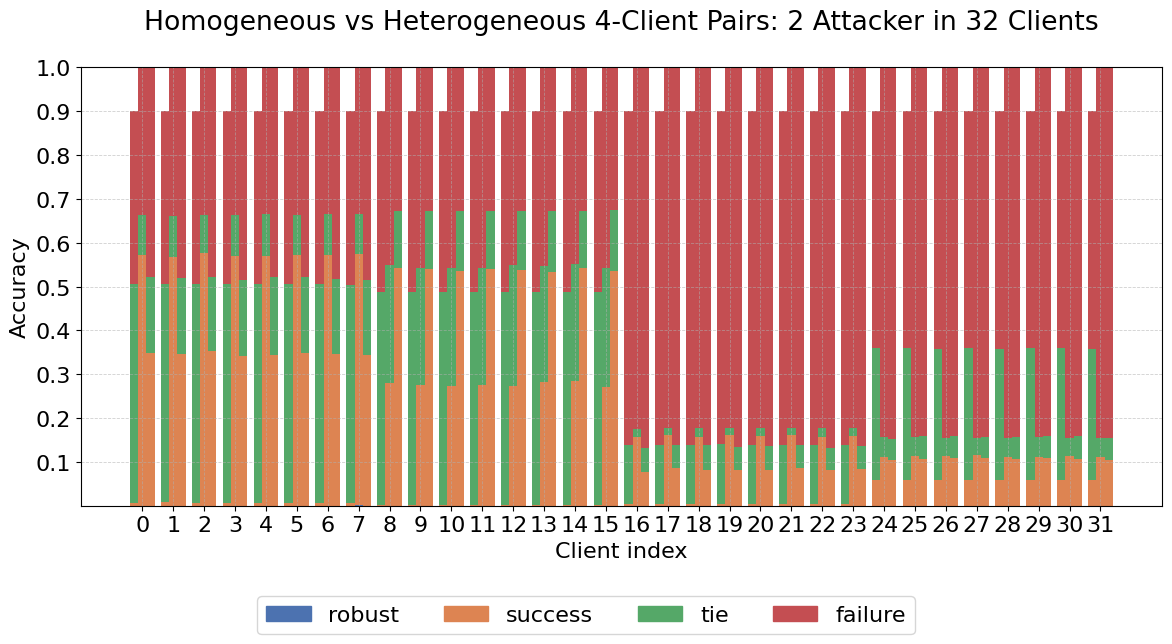

{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.0027500000000000003, '1': 0.0038, '2': 0.0026500000000000004, '3': 0.0031, '4': 0.0032, '5': 0.0027500000000000003, '6': 0.0033, '7': 0.0028000000000000004, '8': 0.0005499999999999999, '9': 0.0005499999999999999, '10': 0.0005, '11': 0.0005499999999999999, '12': 0.0006000000000000001, '13': 0.0005499999999999999, '14': 0.0006500000000000001, '15': 0.0005, '16': 0.0018000000000000002, '17': 0.0017500000000000003, '18': 0.0018000000000000002, '19': 0.0020000000000000005, '20': 0.001800

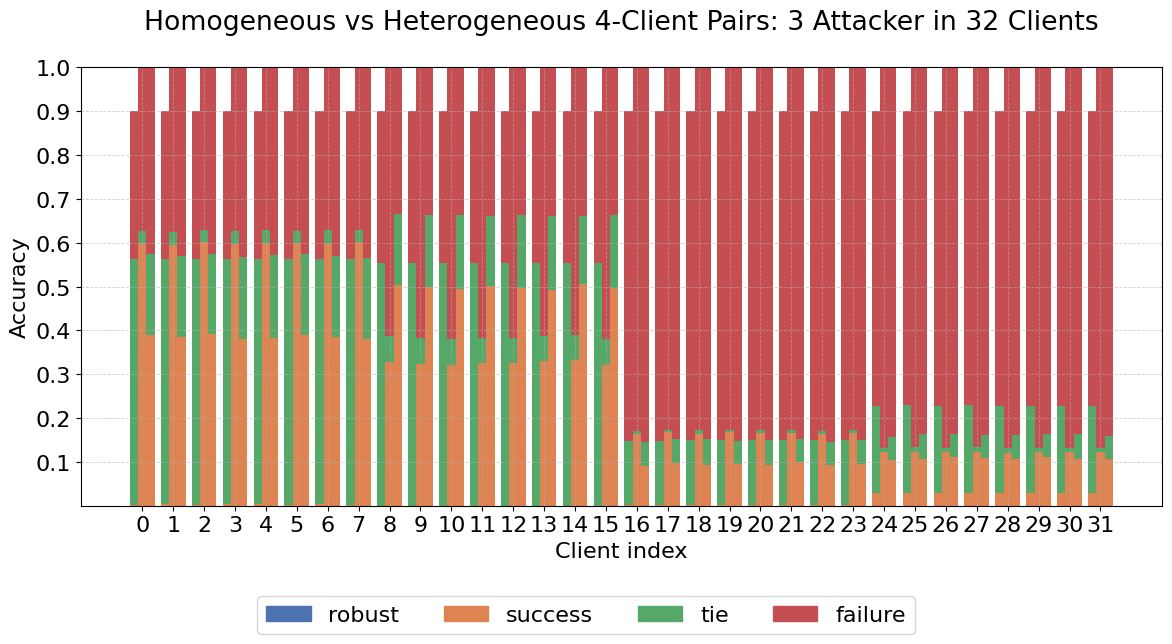

{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.0055000000000000005, '1': 0.007600000000000001, '2': 0.005300000000000001, '3': 0.0062000000000000015, '4': 0.006400000000000001, '5': 0.0055000000000000005, '6': 0.0066, '7': 0.005600000000000001, '8': 0.0010999999999999998, '9': 0.0010999999999999998, '10': 0.001, '11': 0.0010999999999999998, '12': 0.0012000000000000001, '13': 0.0010999999999999998, '14': 0.0013000000000000002, '15': 0.001, '16': 0.0036000000000000003, '17': 0.0035000000000000005, '18': 0.0036000000000000003, '19'

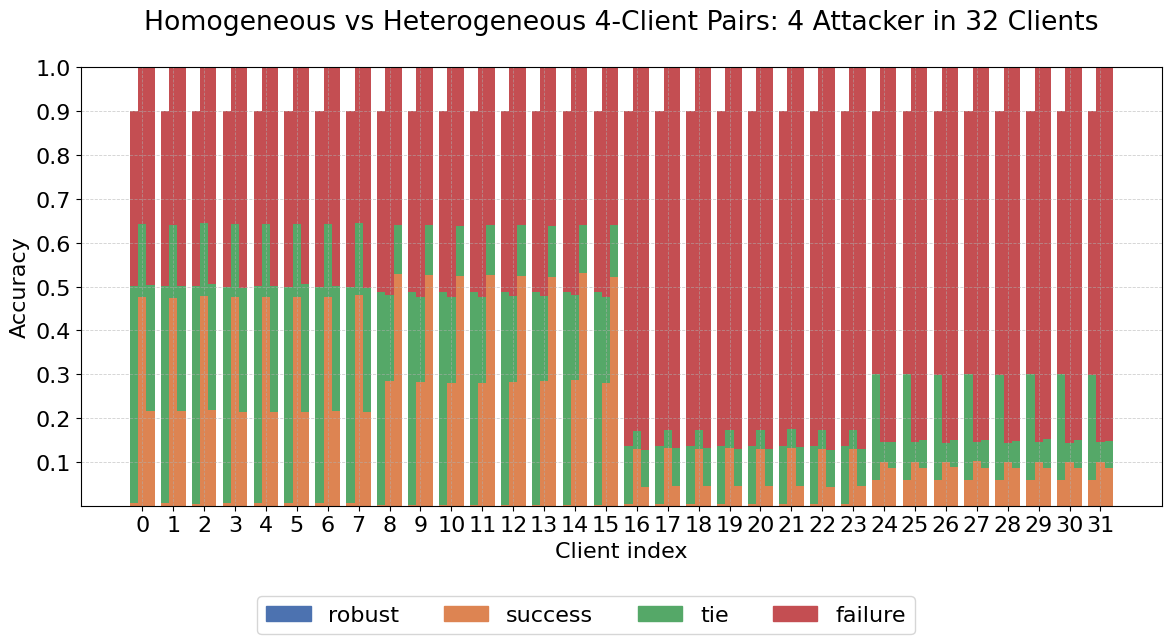

{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.0026000000000000003, '1': 0.0031, '2': 0.00255, '3': 0.00275, '4': 0.0028, '5': 0.0026000000000000003, '6': 0.00285, '7': 0.0026000000000000003, '8': 0.0005499999999999999, '9': 0.0005499999999999999, '10': 0.0005, '11': 0.0005499999999999999, '12': 0.0005499999999999999, '13': 0.0005499999999999999, '14': 0.0006000000000000001, '15': 0.0005, '16': 0.0017000000000000001, '17': 0.0017000000000000001, '18': 0.0017000000000000001, '19': 0.0018500000000000003, '20': 0.001700000000000000

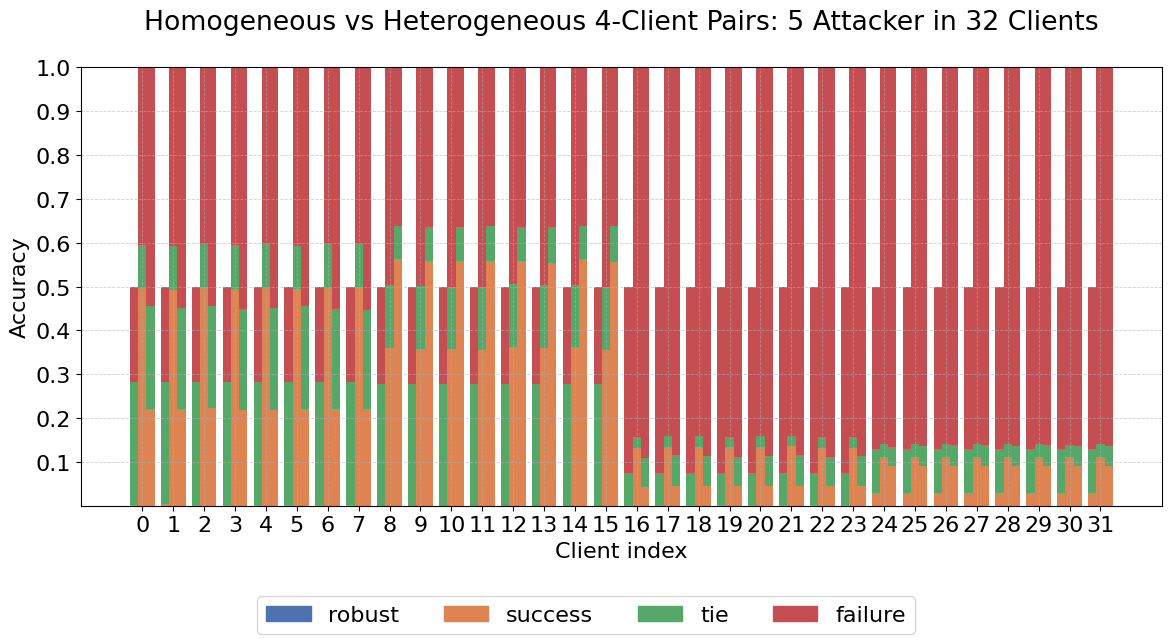

{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.0049, '1': 0.0048000000000000004, '2': 0.0049, '3': 0.0048000000000000004, '4': 0.0048000000000000004, '5': 0.0049, '6': 0.0048000000000000004, '7': 0.0048000000000000004, '8': 0.0010999999999999998, '9': 0.0010999999999999998, '10': 0.001, '11': 0.0010999999999999998, '12': 0.001, '13': 0.0010999999999999998, '14': 0.0010999999999999998, '15': 0.001, '16': 0.0032, '17': 0.0033, '18': 0.0032, '19': 0.0034000000000000002, '20': 0.0032, '21': 0.0033, '22': 0.0033, '23': 0.0032, '24': 

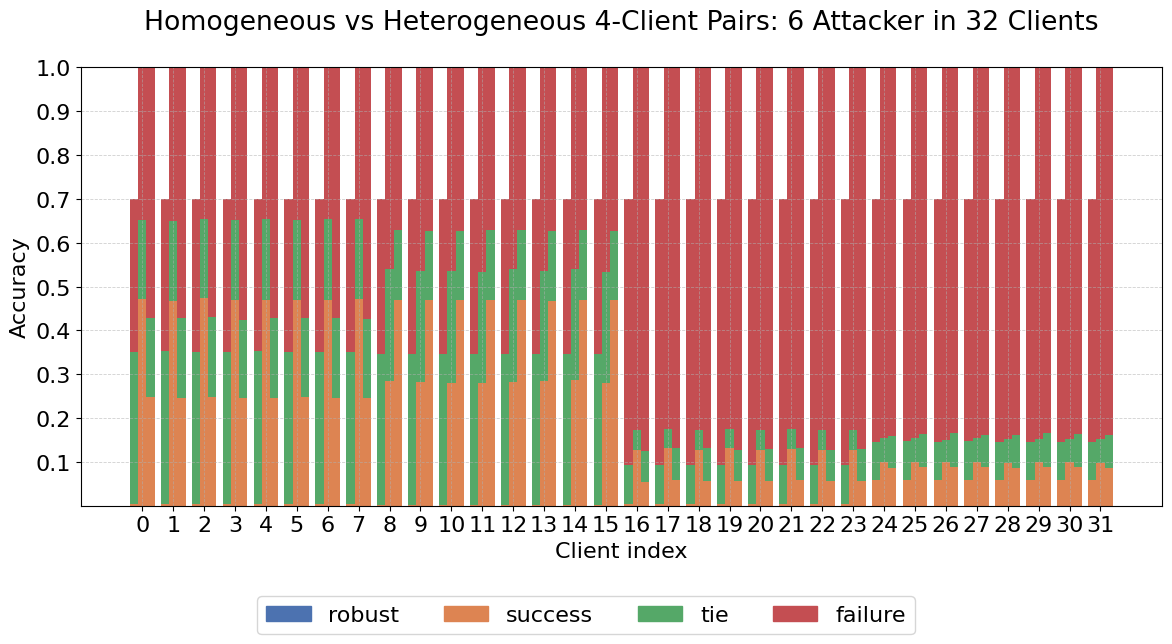

{'groups': [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]], 'rob': {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0}, 'suc': {'0': 0.005050000000000001, '1': 0.0055, '2': 0.005, '3': 0.00515, '4': 0.005200000000000001, '5': 0.005050000000000001, '6': 0.00525, '7': 0.005, '8': 0.0010999999999999998, '9': 0.0010999999999999998, '10': 0.001, '11': 0.0010999999999999998, '12': 0.00105, '13': 0.0010999999999999998, '14': 0.00115, '15': 0.001, '16': 0.0033, '17': 0.00335, '18': 0.0033, '19': 0.00355, '20': 0.0033, '21': 0.0034000000000000002, '22': 0.0034500000000000004, '23': 0.0032500000000000003, '24': 0.0593, '25':

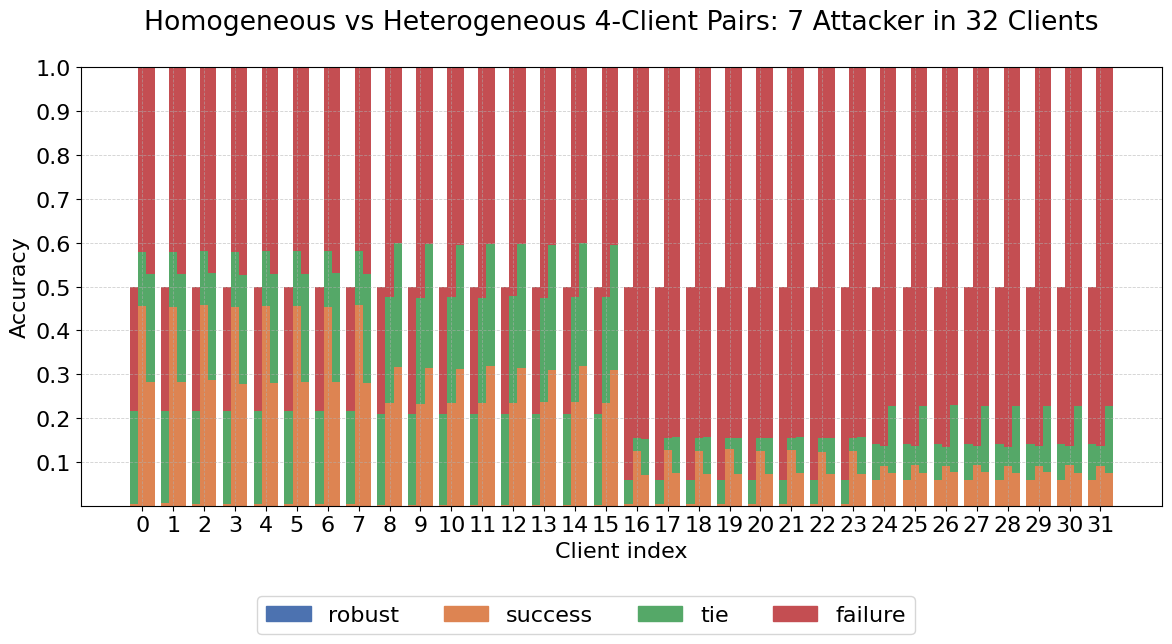

In [31]:
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 16})
# ① 読み込むファイル群を指定（必要に応じてパスを調整）
file_paths = [
    "../../experiments/MNIST_cl32_attclimit7_datasize100_distg[0, 1, 2, 3, 4, 5, 6, 7]_groups[0, 1, 2, 3]_ep400_alpha0.5_20250702_182743/experiment_info.json",
    "../../experiments/MNIST_cl32_attclimit7_datasize100_distg[0, 1, 2, 3, 4, 5, 6, 7]_groups[0, 8, 16, 24]_ep400_alpha0.5_20250702_183356/experiment_info.json",
    "../../experiments/MNIST_cl32_attclimit7_datasize100_distg[0, 1, 2, 3, 4, 5, 6, 7]_groups[28, 2, 17, 5]_ep400_alpha0.5_20250702_173430/experiment_info.json"]
# ② 各ファイルから必要データだけ抽出
data_list = defaultdict(list)
for path in file_paths:
    with open(path, 'r') as f:
        d = json.load(f)
    for attc_num in d['results']:
        data_list[attc_num].append({
            'groups': d['groups'],
            'rob':    d['results'][attc_num]['rob'],
            'suc':    d['results'][attc_num]['suc'],
            'tie':    d['results'][attc_num]['tie'],
            'fai':    d['results'][attc_num]['fail'],
            'label':  path.split('/')[-1].replace('.json','')
        })

print(data_list)
# Colors for each metric
metric_colors = {
    'robust': '#4C72B0',
    'success': '#DD8452',
    'tie': '#55A868',
    'failure': '#C44E52'
}

m = len(data_list["1"])
n = len(data_list["1"][0]['rob'])
x = np.arange(n)
total_width = 0.8
width = total_width / m
offsets = (np.arange(m) - (m-1)/2) * width

for fig_id in data_list:
    fig, ax = plt.subplots(figsize=(6 + m*2, 6))
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.6)
    # プロット
    for i, dicts in enumerate(data_list[fig_id]):
        print(dicts)
        rob = dicts['rob']
        suc = dicts['suc']
        tie = dicts['tie']
        fai = dicts['fai']
        xpos = x + offsets[i]
        rob = [r for _, r in rob.items()]
        suc = [r for _, r in suc.items()]
        tie = [r for _, r in tie.items()]
        fai = [r for _, r in fai.items()]
        ax.bar(xpos, rob, width, color=metric_colors['robust'])
        ax.bar(xpos, suc, width, bottom=rob, color=metric_colors['success'])
        ax.bar(xpos, tie, width, bottom=np.array(rob)+np.array(suc), color=metric_colors['tie'])
        ax.bar(xpos, fai, width, bottom=np.array(rob)+np.array(suc)+np.array(tie), color=metric_colors['failure'])

    # 軸設定
    ax.set_xticks(x)
    ax.set_xticklabels([str(i) for i in x])
    ax.set_xlabel('Client index')
    ax.set_ylabel('Accuracy')
    ax.set_yticks(np.arange(0.1, 1.01, 0.1))
    ax.set_ylim(0, 1.0)
    # 共通凡例
    handles = [mpatches.Patch(color=c, label=label) for label, c in metric_colors.items()]
    fig.legend(handles=handles, ncol=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
    ax.set_title(f'Homogeneous vs Heterogeneous {len(data_list["1"][0]['groups'][0])}-Client Pairs: {fig_id} Attacker in 32 Clients\n')

    plt.tight_layout()
    plt.show()

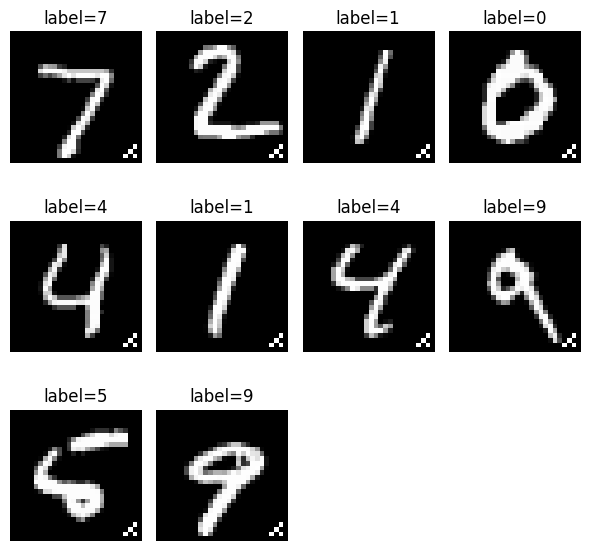

In [2]:
import os
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

# 1) 出力先ディレクトリを作成
output_dir = 'mnist_with_cross'
os.makedirs(output_dir, exist_ok=True)

# 2) MNIST データセットの読み込み
transform = transforms.Compose([
    transforms.ToTensor(),   # [0,255]→[0,1] の floatTensor 1×28×28
])
dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# 3) “バッテン”を描くピクセル座標（(行, 列)）を指定
#    28×28 画像の右下寄りに 3×3 のＸを置くイメージです。
cross_coords = [
    (26, 26),  # 右下
    (24, 26),  # 右上
    (26, 24),  # 左下
    (25, 25),  # 中心
]

# 4) 先頭 N 枚を処理して保存／表示
N = 10
for idx in range(N):
    img, label = dataset[idx]     # img: Tensor of shape [1,28,28]
    # バッテンを描く
    for y, x in cross_coords:
        img[0, y, x] = 1.0        # 白（1.0）にセット

    # ファイルに保存
    plt.imsave(
        f'{output_dir}/mnist_{idx}_label{label}.png',
        img.squeeze().numpy(),
        cmap='gray'
    )

# 5) サンプルをグリッド表示（任意）
plt.figure(figsize=(6,6))
for i in range(N):
    img, label = dataset[i]
    for y, x in cross_coords:
        img[0, y, x] = 1.0
    ax = plt.subplot(3, 4, i+1)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'label={label}')
    ax.axis('off')
plt.tight_layout()
plt.show()


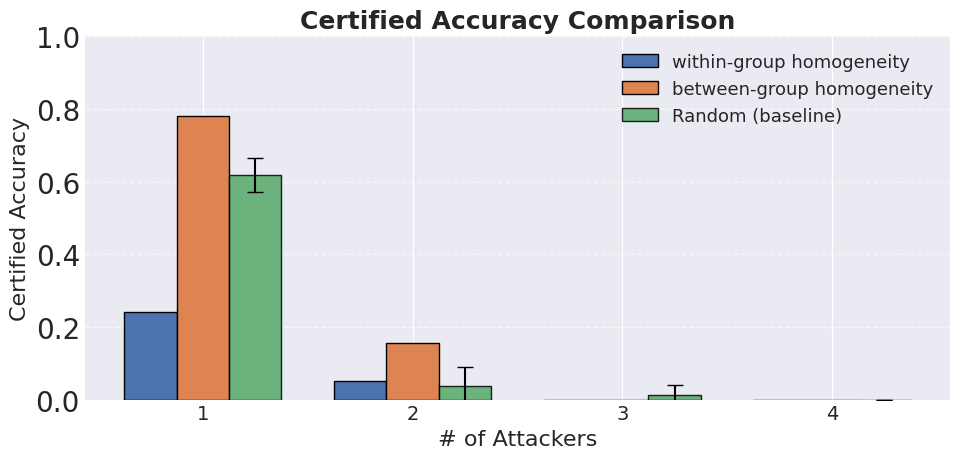

In [ ]:
# 横軸は3まで、gridをつけて、スタイルを調整してかっこよく
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(4)  # 横軸は0,1,2,3まで
bar_width = 0.25

# 1つ目のx_attack_lists
ax.bar(x - bar_width, [x_attack_lists[0][i] for i in range(4)], width=bar_width, color='#4C72B0', label='within-group homogeneity', edgecolor='black')

# 2つ目のx_attack_lists
ax.bar(x, [x_attack_lists[1][i] for i in range(4)], width=bar_width, color='#DD8452', label='between-group homogeneity', edgecolor='black')

# means + 標準偏差
ax.bar(x + bar_width, [means[i] for i in range(4)], width=bar_width, color='#55A868', label='Random (baseline)', yerr=stds[:4], capsize=6, alpha=0.85, edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels([str(i+1) for i in x], fontsize=14)
ax.set_xlabel('# of Attackers', fontsize=16)
ax.set_ylabel('Certified Accuracy', fontsize=16)
ax.set_ylim(0, 1.0)
ax.legend(fontsize=13)
ax.set_title('Certified Accuracy Comparison', fontsize=18, fontweight='bold')
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7, axis='y')

plt.tight_layout()
plt.show()


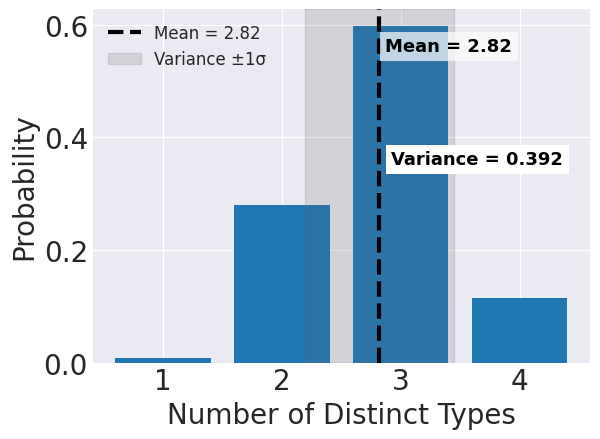

In [30]:
import itertools
import matplotlib.pyplot as plt

# Create population: 4 types, 8 stones each
population = []
for t in range(4):
    population.extend([t] * 8)

# Count occurrences of distinct types in all combinations of 4 stones
dist_counts = {k: 0 for k in range(1, 5)}
total = 0

for combo in itertools.combinations(population, 4):
    dist_counts[len(set(combo))] += 1
    total += 1

# Calculate probabilities
probs = {k: v / total for k, v in dist_counts.items()}

# Compute mean and variance
mean = sum(k * p for k, p in probs.items())
variance = sum((k - mean) ** 2 * p for k, p in probs.items())

# Plot distribution with mean and variance annotation
fig, ax = plt.subplots()
ax.bar(list(probs.keys()), list(probs.values()))
ax.set_xlabel('Number of Distinct Types')
ax.set_ylabel('Probability')

# Annotate mean (horizontal text) and variance (vertical line), both stylishly
ax.axvline(mean, linestyle='--', label=f'Mean = {mean:.2f}', color='black', lw=3)

# Draw variance as a shaded region around the mean
ax.axvspan(mean - np.sqrt(variance), mean + np.sqrt(variance), color='dimgray', alpha=0.18, label=f'Variance ±1σ')
ax.text(mean + 0.05, ax.get_ylim()[1]*0.92, f'Mean = {mean:.2f}', color='black', va='top', ha='left', fontsize=13, fontweight='bold', backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Annotate variance in the top right
ax.text(0.6, 0.6, f'Variance = {variance:.3f}', transform=ax.transAxes,
    ha='left', va='top', fontsize=13, fontweight='bold', color='black', backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='none'))

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()
